___
# PROJETO 3: PREDIÇÃO
___
    
### Integrantes:
    1. Bernardo Sarcinelli  
    2. Daniel Freitas
    3. Maria Eduarda Rocha

<div id="leitura"></div>

## INTRODUÇÃO

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Base de Dados Escolhida:
Para este projeto utilizaremos a Base de Dados referente ao 4° semestre de 2023.
O arquivo utilizado foi disponibilizado do notebook 'Leitura PNADC 2023' por meio do link
https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1,
sendo baixado como 'pnad23_4' no formato csv, logo, 'pnad23_4.csv'.

In [5]:
filename = 'pnad23_4.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'Esse deve ser salvo na mesma pasta em que se encontrar este arquivo jupyter notebook')

Parece que o arquivo pnad23_4.csv está na mesma pasta do notebook, yay!


In [6]:
# Leitura dos Dados correspondentes

dados = pd.read_csv('pnad23_4.csv')
print('DADOS - QUARTO SEMESTRE (2023)')
dados

DADOS - QUARTO SEMESTRE (2023)


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
1,2023,4,11,11.0,NaN,110000016,1110011,1,10,5,...,309.630691,961.950570,327.243550,0.0,0.000000,0.0,674.475073,358.970348,292.658661,690.889317
2,2023,4,11,11.0,NaN,110000016,1110011,2,10,5,...,175.916359,512.399129,176.708843,0.0,0.000000,0.0,378.226179,197.177218,158.596782,357.260151
3,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
4,2023,4,11,11.0,NaN,110000016,1110011,3,10,5,...,345.320733,1013.292950,358.249489,0.0,0.000000,0.0,758.636016,399.415616,310.512617,754.605577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473201,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473202,2023,4,53,53.0,NaN,530060880,5310111,12,11,3,...,0.000000,755.120680,0.000000,0.0,382.269011,0.0,778.608964,816.826409,0.000000,0.000000
473203,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000
473204,2023,4,53,53.0,NaN,530060880,5310111,14,11,3,...,0.000000,677.804483,0.000000,0.0,347.520587,0.0,682.776135,707.652015,0.000000,0.000000


In [7]:
# Especificação das Colunas que serão utilizadas
colunas = [
           'UF',    # Estado
           'V2007', # Sexo
           'V2010', # Cor ou raça
           'V2009', # Idade
           'V3001', # Alfabetizado
           'V3008', # Frequentou a escola
           'VD3004', # Nível de Escolaridade
           'V4012', # Tipo de ocupação
           'VD4014', # Faixa de horas trabalhadas
           'VD4017', # Rendimento Mensal Efetivo
           'V403411', # Faixa de Rendimento [em SM - Salário Mínimo]
           'V1022', # Situação do domicílio          
]   

In [8]:
# Filtrando apenas as colunas desejadas
dados_colunas = dados[colunas]

In [9]:
# Renomeando as colunas
dados_colunas = dados_colunas.rename(columns={
    'UF': 'Estado',
    'V2007': 'Sexo',
    'V2010': 'Cor_Raça',
    'V2009': 'Idade',
    'V3001': 'Alfabetizado',
    'V3008': 'Frequentou a Escola',
    'VD3004': 'Nível de Instruçao',
    'V4012': 'Tipo de Ocupacao',
    'VD4014': 'Faixa de horas trabalhadas',
    'VD4017': 'Rendimento Mensal Efetivo',
    'V403411': 'Faixa de Rendimento [em SM]',
    'V1022': 'Situacao do Domicílio'
})

In [10]:
# Reconfigurando as informações das colunas

# Estado
dados_colunas['Estado'] = dados_colunas['Estado'].astype('category')
dados_colunas['Estado'] = dados_colunas['Estado'].cat.rename_categories({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 
    52: 'Goiás', 53: 'Distrito Federal'
})

# Sexo
dados_colunas['Sexo'] = dados_colunas['Sexo'].astype('category')
dados_colunas['Sexo'] = dados_colunas['Sexo'].cat.rename_categories({1: 'Homem', 2: 'Mulher'})

# Cor_Raça
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].astype('category')
dados_colunas['Cor_Raça'] = dados_colunas['Cor_Raça'].cat.rename_categories({
    1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})

# Alfabetizado
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].astype('category')
dados_colunas['Alfabetizado'] = dados_colunas['Alfabetizado'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Frequentou_Escola
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].astype('category')
dados_colunas['Frequentou a Escola'] = dados_colunas['Frequentou a Escola'].cat.rename_categories({1: 'Sim', 2: 'Não'})

# Nível de Instruçao
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].astype('category')
dados_colunas['Nível de Instruçao'] = dados_colunas['Nível de Instruçao'].cat.rename_categories({
    1: 'Sem instrução e menos de 1 ano de estudo',
    2: 'Fundamental incompleto ou equivalente',
    3: 'Fundamental completo ou equivalente',
    4: 'Médio incompleto ou equivalente',
    5: 'Médio completo ou equivalente',
    6: 'Superior incompleto ou equivalente',
    7: 'Superior completo'
})

# Tipo_Ocupacao
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].astype('category')
dados_colunas['Tipo de Ocupacao'] = dados_colunas['Tipo de Ocupacao'].cat.rename_categories({
    1: 'Trabalhador doméstico', 
    2: 'Militar ou segurança pública', 
    3: 'Empregado setor privado', 
    4: 'Empregado setor público', 
    5: 'Conta própria', 
    6: 'Empregador', 
    7: 'Trabalhador familiar não remunerado', 
    9: 'Não aplicável'
})

# Faixa de horas trabalhadas
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].astype('category')
dados_colunas['Faixa de horas trabalhadas'] = dados_colunas['Faixa de horas trabalhadas'].cat.rename_categories({
    1: 'Até 14 horas', 
    2: '15 a 39 horas', 
    3: '40 a 44 horas', 
    4: '45 a 48 horas', 
    5: '49 horas ou mais', 
})

# Situacao_Domicilio
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].astype('category')
dados_colunas['Situacao do Domicílio'] = dados_colunas['Situacao do Domicílio'].cat.rename_categories({1: 'Urbana', 2: 'Rural'})

# Faixa_Rendimento
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].astype('category')
dados_colunas['Faixa de Rendimento [em SM]'] = dados_colunas['Faixa de Rendimento [em SM]'].cat.rename_categories({
    0: '0',
    1: '0 a 0,5',
    2: '0,5 a 1',
    3: '1 a 2',
    4: '2 a 3',
    5: '3 a 5',
    6: '5 a 10',
    7: '10 a 20',
    8: '20 ou mais',
})

dados_colunas['Idade'] = dados_colunas['Idade'].astype('Int64')
dados_colunas['Rendimento Mensal Efetivo'] = dados_colunas['Rendimento Mensal Efetivo'].astype('Int64')

In [11]:
# Filtrando apenas pessoas com 18 ou mais anos de Idade e Removendo NaN
dados_colunas = dados_colunas[dados_colunas['Idade'] >= 18]
dados_colunas = dados_colunas.dropna(subset=['Rendimento Mensal Efetivo'])

In [12]:
dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...
473193,Distrito Federal,Homem,Branca,49,Sim,Sim,Superior completo,Empregado setor público,49 horas ou mais,11000,5 a 10,Urbana
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana


In [13]:
# Adicionando as respectivas regiões

norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

def regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in sul:
        return 'Sul'
    elif estado in sudeste:
        return 'Sudeste'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

dados_colunas['Regiao'] = dados_colunas['Estado'].apply(regiao)

dados_colunas

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
0,Rondônia,Homem,Parda,31,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Norte
2,Rondônia,Mulher,Parda,50,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
7,Rondônia,Mulher,Branca,55,Sim,Sim,Superior completo,Empregado setor público,15 a 39 horas,3500,2 a 3,Urbana,Norte
9,Rondônia,Homem,Parda,36,Sim,Sim,Fundamental completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
11,Rondônia,Homem,Branca,33,Sim,Sim,Médio completo ou equivalente,Empregador,40 a 44 horas,3000,2 a 3,Urbana,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473193,Distrito Federal,Homem,Branca,49,Sim,Sim,Superior completo,Empregado setor público,49 horas ou mais,11000,5 a 10,Urbana,Centro-Oeste
473197,Distrito Federal,Mulher,Branca,46,Sim,Sim,Médio completo ou equivalente,Empregado setor público,40 a 44 horas,2600,1 a 2,Urbana,Centro-Oeste
473202,Distrito Federal,Homem,Branca,24,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,5000,3 a 5,Urbana,Centro-Oeste
473203,Distrito Federal,Homem,Branca,51,Sim,Sim,Superior completo,Empregador,40 a 44 horas,5000,3 a 5,Urbana,Centro-Oeste


# Análise Exploratória de Dados

In [14]:
# FILTRANDO AS REGIÕES

# Norte
dados_colunas_Norte = dados_colunas[dados_colunas['Regiao'] == 'Norte' ]

# Norte
dados_colunas_Sul = dados_colunas[dados_colunas['Regiao'] == 'Sul' ]

# Norte
dados_colunas_Sudeste = dados_colunas[dados_colunas['Regiao'] == 'Sudeste' ]

# Norte
dados_colunas_Centro_Oeste = dados_colunas[dados_colunas['Regiao'] == 'Centro-Oeste' ]

# Norte
dados_colunas_Nordeste = dados_colunas[dados_colunas['Regiao'] == 'Nordeste' ]

### Brasil (Todas as Regiões)

Nível de Instruçao,Sem instrução e menos de 1 ano de estudo,Fundamental incompleto ou equivalente,Fundamental completo ou equivalente,Médio incompleto ou equivalente,Médio completo ou equivalente,Superior incompleto ou equivalente,Superior completo
Regiao,,,,,,,
Centro-Oeste,486,4584,1474,1624,7406,1499,5744
Nordeste,3017,13919,3584,3422,18663,2519,8969
Norte,1008,5664,1579,1660,9058,1358,5012
Sudeste,845,11002,4019,3288,20997,3278,14061
Sul,543,7707,3560,2342,12763,2469,8750


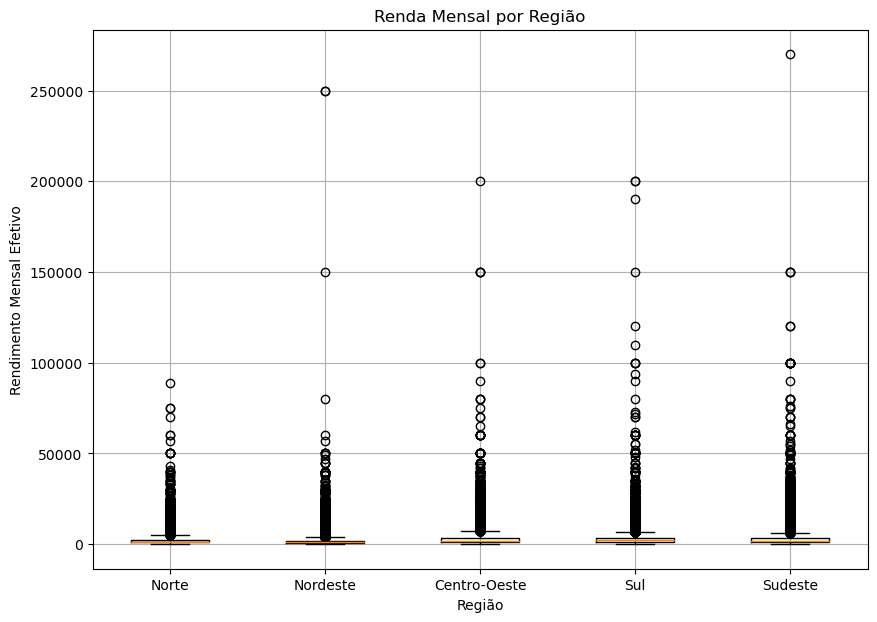

In [15]:
# RELAÇÕES BRASIL

Brasil = pd.crosstab(dados_colunas['Regiao'],dados_colunas['Nível de Instruçao'])
display(Brasil)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([dados_colunas_Norte['Rendimento Mensal Efetivo'],dados_colunas_Nordeste['Rendimento Mensal Efetivo'],
dados_colunas_Centro_Oeste['Rendimento Mensal Efetivo'],dados_colunas_Sul['Rendimento Mensal Efetivo'],
dados_colunas_Sudeste['Rendimento Mensal Efetivo']],labels=['Norte', 'Nordeste', 'Centro-Oeste', 'Sul', 'Sudeste'],)

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Região')
plt.title('Renda Mensal por Região')
plt.show()

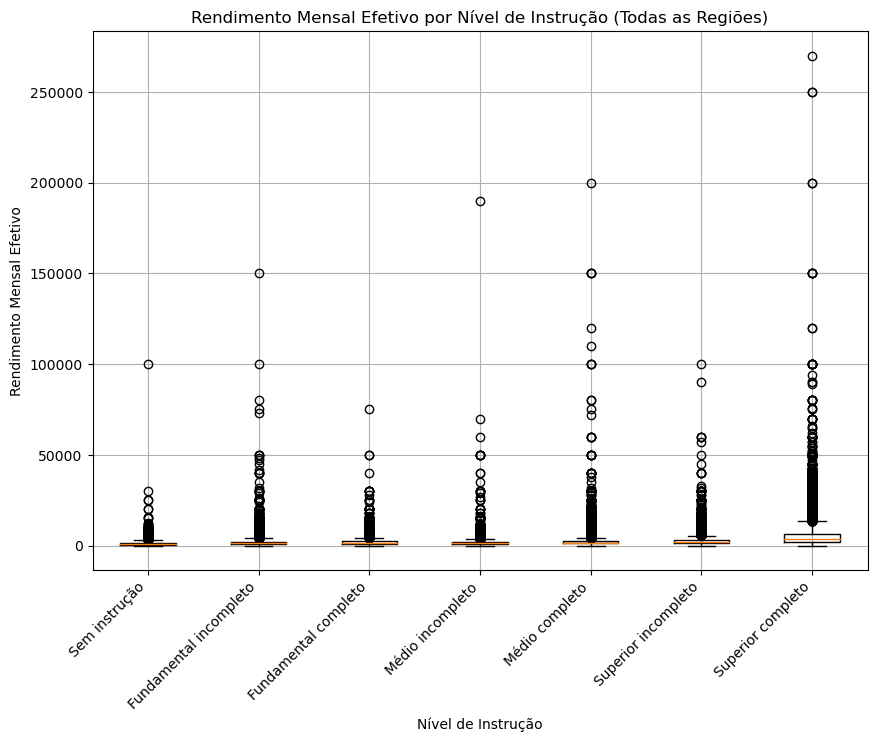

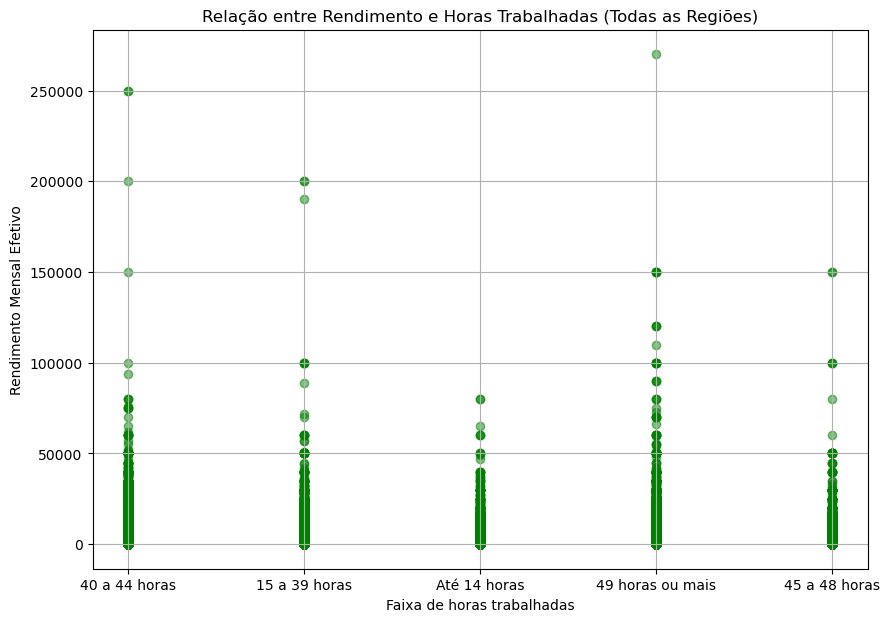

In [16]:
plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas[dados_colunas['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
],labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução (Todas as Regiões)')
plt.xticks(rotation=45, ha='right')
plt.show()

# --------------------------------------------

rendimento_geral = dados_colunas['Rendimento Mensal Efetivo']
horas_trabalhadas_geral = dados_colunas['Faixa de horas trabalhadas']

plt.figure(figsize=(10, 7))
plt.scatter(horas_trabalhadas_geral, rendimento_geral, color='green', alpha=0.5)
plt.title('Relação entre Rendimento e Horas Trabalhadas (Todas as Regiões)')
plt.xlabel('Faixa de horas trabalhadas')
plt.ylabel('Rendimento Mensal Efetivo')
plt.grid()
plt.show()

### REGIÃO NORTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,74,280,357,224,37,28,5,1,0
Fundamental incompleto ou equivalente,394,1465,1883,1388,308,155,51,14,2
Fundamental completo ou equivalente,83,286,541,463,117,58,21,9,1
Médio incompleto ou equivalente,61,330,613,508,78,52,13,5,0
Médio completo ou equivalente,232,1036,3039,3181,857,513,148,46,4
Superior incompleto ou equivalente,29,107,445,459,156,107,43,10,2
Superior completo,29,95,514,1231,925,1204,741,228,45


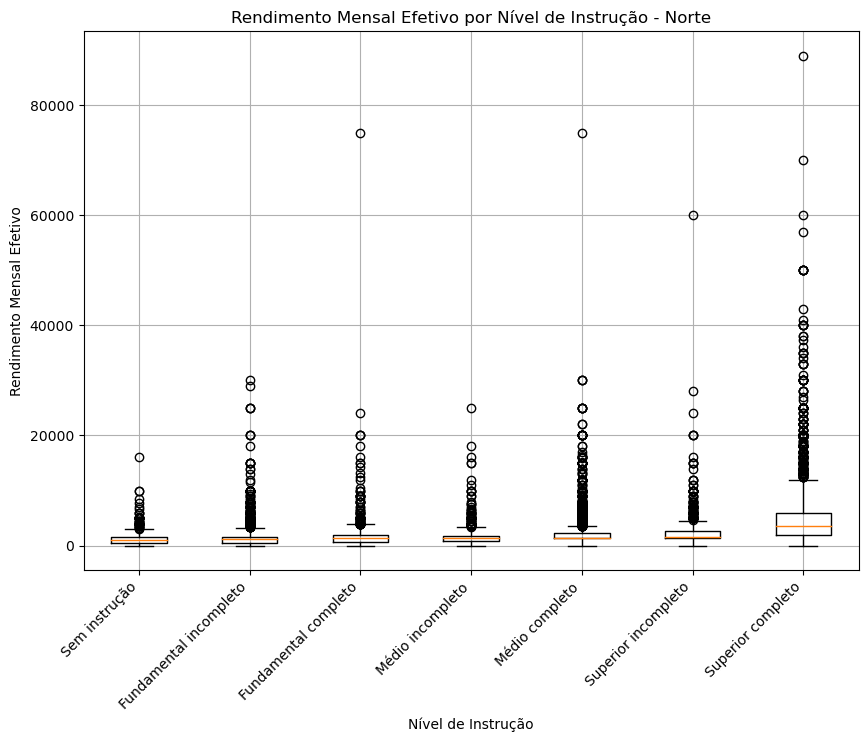

In [17]:
# RELAÇÕES - REGIÃO NORTE

Norte = pd.crosstab(dados_colunas_Norte['Nível de Instruçao'],dados_colunas_Norte['Faixa de Rendimento [em SM]'])
display(Norte)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Norte[dados_colunas_Norte['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Norte')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO NORDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,201,1500,887,294,35,20,3,1,0
Fundamental incompleto ou equivalente,646,5604,5044,1944,292,161,44,14,4
Fundamental completo ou equivalente,149,1150,1332,698,137,69,16,8,3
Médio incompleto ou equivalente,107,1068,1332,705,114,58,21,1,4
Médio completo ou equivalente,399,3525,7506,5199,1051,669,222,47,7
Superior incompleto ou equivalente,43,288,987,735,219,147,72,18,10
Superior completo,106,307,1519,2335,1454,1811,1012,337,86


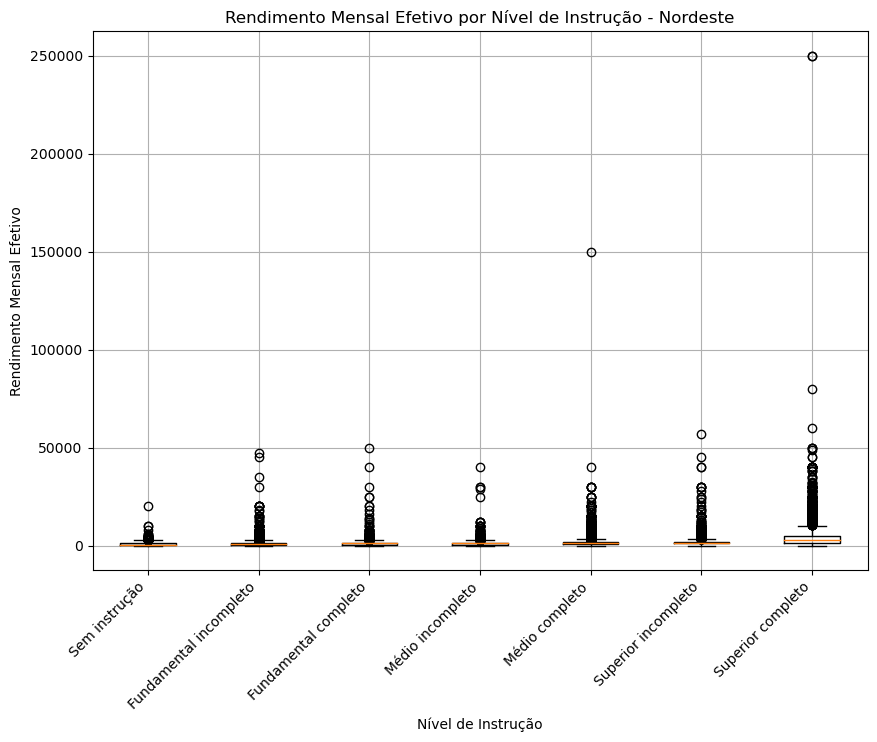

In [18]:
# RELAÇÕES - REGIÃO Nordeste

Nordeste = pd.crosstab(dados_colunas_Nordeste['Nível de Instruçao'],dados_colunas_Nordeste['Faixa de Rendimento [em SM]'])
display(Nordeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Nordeste[dados_colunas_Nordeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Nordeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO CENTRO-OESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,15,80,153,160,51,15,7,3,2
Fundamental incompleto ou equivalente,125,525,1131,1778,572,338,90,15,10
Fundamental completo ou equivalente,29,135,343,597,204,116,37,11,2
Médio incompleto ou equivalente,28,121,388,701,222,125,27,6,6
Médio completo ou equivalente,118,352,1510,3177,1055,825,280,67,22
Superior incompleto ou equivalente,24,63,350,565,211,175,79,24,8
Superior completo,50,50,337,1143,951,1462,1125,473,153


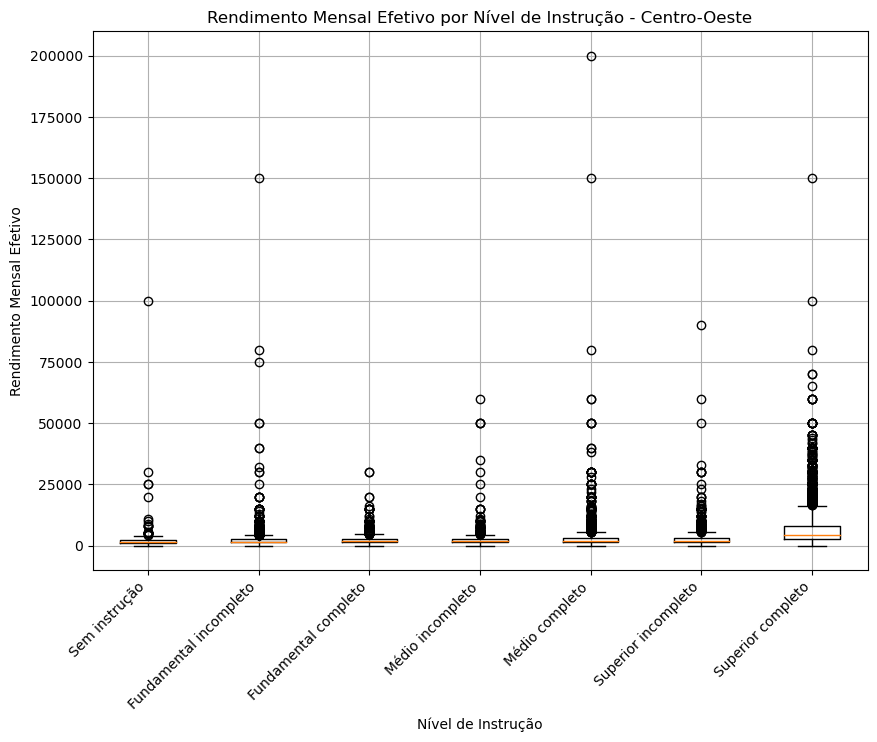

In [19]:
# RELAÇÕES - REGIÃO Centro-Oeste

Centro_Oeste = pd.crosstab(dados_colunas_Centro_Oeste['Nível de Instruçao'],dados_colunas_Centro_Oeste['Faixa de Rendimento [em SM]'])
display(Centro_Oeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Centro_Oeste[dados_colunas_Centro_Oeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Centro-Oeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUDESTE

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,23,143,266,307,65,26,14,1,0
Fundamental incompleto ou equivalente,365,1512,3435,4201,877,468,109,23,5
Fundamental completo ou equivalente,96,324,1162,1714,432,234,48,7,2
Médio incompleto ou equivalente,68,330,965,1407,282,182,40,11,3
Médio completo ou equivalente,307,1118,4590,9533,2897,1885,516,125,25
Superior incompleto ou equivalente,47,149,626,1301,477,441,188,44,5
Superior completo,98,171,716,3109,2409,3512,2625,1089,332


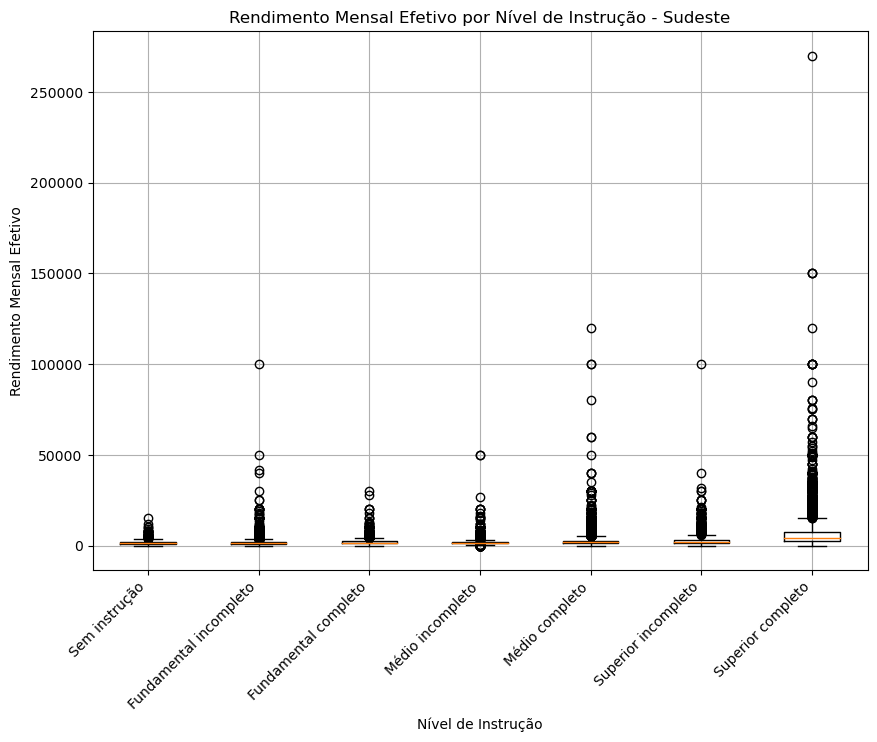

In [20]:
# RELAÇÕES - REGIÃO Sudeste

Sudeste = pd.crosstab(dados_colunas_Sudeste['Nível de Instruçao'],dados_colunas_Sudeste['Faixa de Rendimento [em SM]'])
display(Sudeste)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sudeste[dados_colunas_Sudeste['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sudeste')
plt.xticks(rotation=45, ha='right')
plt.show()

### REGIÃO SUL

Faixa de Rendimento [em SM],0,"0 a 0,5","0,5 a 1",1 a 2,2 a 3,3 a 5,5 a 10,10 a 20,20 ou mais
Nível de Instruçao,,,,,,,,,
Sem instrução e menos de 1 ano de estudo,14,54,92,289,56,24,13,1,0
Fundamental incompleto ou equivalente,373,724,1596,3325,963,549,132,38,4
Fundamental completo ou equivalente,106,223,561,1694,584,300,67,20,3
Médio incompleto ou equivalente,51,135,410,1152,337,201,47,5,4
Médio completo ou equivalente,223,368,1442,6345,2306,1541,449,70,18
Superior incompleto ou equivalente,41,79,322,1010,439,388,156,28,6
Superior completo,100,52,341,1902,1546,2468,1579,609,153


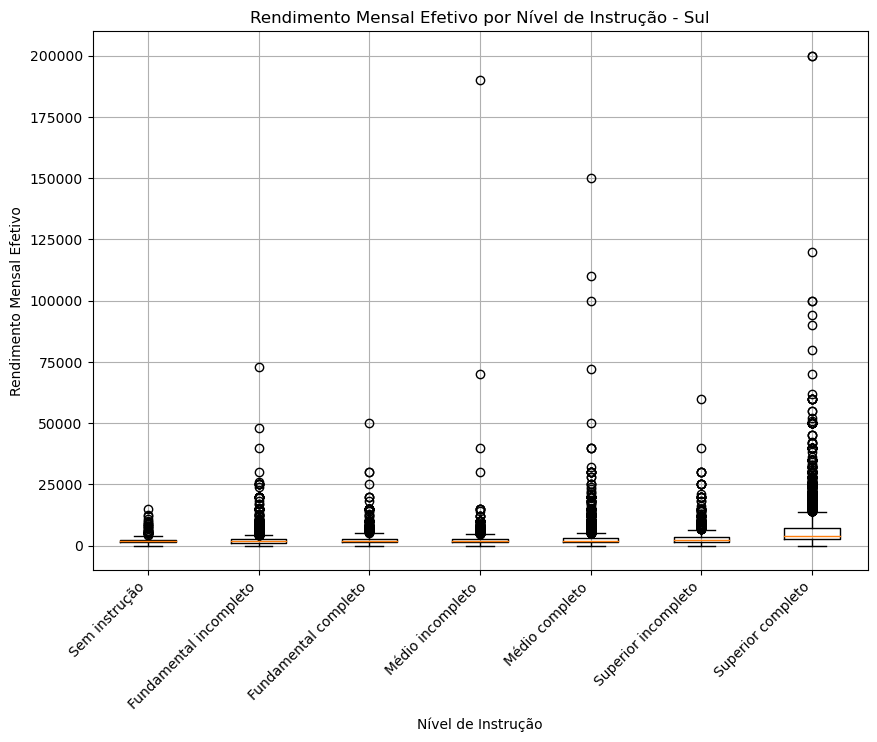

In [21]:
# RELAÇÕES - REGIÃO Sul

Sul = pd.crosstab(dados_colunas_Sul['Nível de Instruçao'],dados_colunas_Sul['Faixa de Rendimento [em SM]'])
display(Sul)

# --------------------------------------------

plt.figure(figsize=(10, 7))
plt.boxplot([
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Sem instrução e menos de 1 ano de estudo']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Fundamental completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Médio completo ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior incompleto ou equivalente']['Rendimento Mensal Efetivo'],
    dados_colunas_Sul[dados_colunas_Sul['Nível de Instruçao'] == 'Superior completo']['Rendimento Mensal Efetivo']
], labels=['Sem instrução', 'Fundamental incompleto', 'Fundamental completo', 'Médio incompleto', 'Médio completo', 'Superior incompleto', 'Superior completo'])

plt.grid()
plt.ylabel('Rendimento Mensal Efetivo')
plt.xlabel('Nível de Instrução')
plt.title('Rendimento Mensal Efetivo por Nível de Instrução - Sul')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
tamanho=len(dados_colunas)
tamanho_treino=len(dados_colunas)*0.8
dados_colunas2=dados_colunas.sample(int(tamanho))
dados_colunas_treino=dados_colunas2.iloc[:int(tamanho_treino)]
dados_colunas_teste=dados_colunas2.iloc[int(tamanho_treino):tamanho]
dados_colunas_teste

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
439358,Mato Grosso,Mulher,Branca,26,Sim,NaN,Superior incompleto ou equivalente,Trabalhador doméstico,40 a 44 horas,1320,"0,5 a 1",Rural,Centro-Oeste
58343,Amapá,Mulher,Preta,31,Sim,Sim,Fundamental completo ou equivalente,Empregador,15 a 39 horas,1000,"0,5 a 1",Rural,Norte
164753,Pernambuco,Mulher,Parda,38,Sim,Sim,Médio completo ou equivalente,Empregador,15 a 39 horas,0,0,Rural,Nordeste
354452,Paraná,Mulher,Branca,21,Sim,Sim,Médio completo ou equivalente,Empregador,Até 14 horas,100,"0 a 0,5",Urbana,Sul
196425,Sergipe,Homem,Preta,23,Sim,Sim,Médio completo ou equivalente,Empregado setor privado,15 a 39 horas,840,"0,5 a 1",Urbana,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46442,Pará,Homem,Parda,41,Sim,Sim,Fundamental incompleto ou equivalente,Empregado setor privado,15 a 39 horas,4500,3 a 5,Rural,Norte
276632,Rio de Janeiro,Homem,Branca,40,Sim,Sim,Superior completo,Empregado setor público,40 a 44 horas,3000,2 a 3,Urbana,Sudeste
398982,Santa Catarina,Homem,Branca,38,Sim,Sim,Superior completo,Empregado setor privado,15 a 39 horas,8000,5 a 10,Urbana,Sul
453695,Goiás,Mulher,Preta,20,Sim,NaN,Médio completo ou equivalente,Empregado setor privado,45 a 48 horas,1320,"0,5 a 1",Urbana,Centro-Oeste


In [23]:
dados_colunas_treino

,Estado,Sexo,Cor_Raça,Idade,Alfabetizado,Frequentou a Escola,Nível de Instruçao,Tipo de Ocupacao,Faixa de horas trabalhadas,Rendimento Mensal Efetivo,Faixa de Rendimento [em SM],Situacao do Domicílio,Regiao
436005,Mato Grosso do Sul,Homem,Branca,45,Sim,Sim,Fundamental completo ou equivalente,Empregado setor privado,40 a 44 horas,1320,"0,5 a 1",Urbana,Centro-Oeste
212937,Bahia,Homem,Branca,52,Sim,Sim,Fundamental incompleto ou equivalente,Empregador,49 horas ou mais,1300,"0,5 a 1",Urbana,Nordeste
436915,Mato Grosso,Mulher,Parda,51,Sim,Sim,Fundamental completo ou equivalente,Trabalhador doméstico,40 a 44 horas,1320,"0,5 a 1",Urbana,Centro-Oeste
128152,Ceará,Homem,Parda,58,Sim,Sim,Fundamental incompleto ou equivalente,Empregado setor privado,15 a 39 horas,0,0,Urbana,Nordeste
66482,Maranhão,Homem,Parda,51,Sim,NaN,Fundamental incompleto ou equivalente,Empregado setor privado,40 a 44 horas,1320,"0,5 a 1",Rural,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398244,Santa Catarina,Mulher,Parda,27,Sim,Sim,Médio completo ou equivalente,Empregador,15 a 39 horas,400,"0 a 0,5",Urbana,Sul
226409,Minas Gerais,Mulher,Branca,58,Sim,Sim,Superior completo,Empregado setor público,40 a 44 horas,2000,1 a 2,Urbana,Sudeste
443197,Mato Grosso,Mulher,Parda,20,Sim,Sim,Médio completo ou equivalente,Trabalhador doméstico,40 a 44 horas,1500,1 a 2,Urbana,Centro-Oeste
409393,Rio Grande do Sul,Mulher,Branca,19,Sim,Sim,Fundamental incompleto ou equivalente,Trabalhador doméstico,Até 14 horas,500,"0 a 0,5",Rural,Sul


In [24]:
#regressao

a=pd.get_dummies(dados_colunas,dtype=int, drop_first=True)
dados_colunas4=pd.concat([a],axis=1)
print(a)
dados_colunas4

        Idade  Rendimento Mensal Efetivo  Estado_Acre  Estado_Amazonas  \
0          31                       5000            0                0   
2          50                       3500            0                0   
7          55                       3500            0                0   
9          36                       3000            0                0   
11         33                       3000            0                0   
...       ...                        ...          ...              ...   
473193     49                      11000            0                0   
473197     46                       2600            0                0   
473202     24                       5000            0                0   
473203     51                       5000            0                0   
473204     56                       3500            0                0   

        Estado_Roraima  Estado_Pará  Estado_Amapá  Estado_Tocantins  \
0                    0            0     

,Idade,Rendimento Mensal Efetivo,Estado_Acre,Estado_Amazonas,Estado_Roraima,Estado_Pará,Estado_Amapá,Estado_Tocantins,Estado_Maranhão,Estado_Piauí,...,Faixa de Rendimento [em SM]_2 a 3,Faixa de Rendimento [em SM]_3 a 5,Faixa de Rendimento [em SM]_5 a 10,Faixa de Rendimento [em SM]_10 a 20,Faixa de Rendimento [em SM]_20 ou mais,Situacao do Domicílio_Rural,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
0,31,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,50,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,55,3500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9,36,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11,33,3000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473193,49,11000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
473197,46,2600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473202,24,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
473203,51,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = dados_colunas[['Sexo','Cor_Raça','Idade','Alfabetizado','Frequentou a Escola','Nível de Instruçao','Tipo de Ocupacao','Faixa de horas trabalhadas','Faixa de Rendimento [em SM]','Situacao do Domicílio','Regiao']]
# X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)

Y = dados_colunas['Rendimento Mensal Efetivo']
# Y: coluna do DataFrame utilizada como variável resposta (TARGET)

def regress(Y, X):
    X_cp = sm.add_constant(X)  # Adiciona o intercepto
    model = sm.OLS(Y, X_cp)    # Define o modelo de regressão
    results = model.fit()      # Ajusta o modelo aos dados
    
    return results

results = regress(Y, X)
results.summary()